In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
save_path = r"C:\Users\hp\Desktop\immuniwatch_plots"
os.makedirs(save_path, exist_ok=True) 

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
url = "https://huggingface.co/datasets/AHFIDAILabs/merged_vaccines/resolve/main/clean_scraped_posts.csv"

df = pd.read_csv(url, low_memory=False)

In [6]:
df.head(2)

,Tweet_Text,Reply_Count,Retweet_Count,Like_Count,View_Count,Language,Source,Username,Location,year,month,day,hour,minute,weekday,Post_ID,ID_Source
0,The HPV vaccine is a critical step in preventi...,1.0,0.0,2.0,81.0,English,Twitter,VaccineNet_NG,"Lagos, Nigeria",2024,7,1,17,58,Monday,"=""1807821100576895401""",Platform_ID
1,"New month, new experiences, new opportunities,...",0.0,0.0,2.0,50.0,English,Twitter,VaccineNet_NG,Abuja. Nigeria.,2024,7,1,15,2,Monday,"=""1807776904805580853""",Platform_ID


In [7]:
df1 = df.copy()

In [9]:
cat_columns = df.describe(include=["object", "category"]).columns
cat_columns

Index(['Tweet_Text', 'Language', 'Source', 'Username', 'Location', 'weekday',
       'Post_ID', 'ID_Source'],
      dtype='object')

In [10]:
df['year'].value_counts()

year
2024    18303
2025    16582
2021     5317
2023     3818
2022      491
2019      236
2015       40
2013       34
2011       34
2020       31
2012       25
2016       23
2014       18
2018       18
2017       16
2010       11
2009        7
2008        1
Name: count, dtype: int64

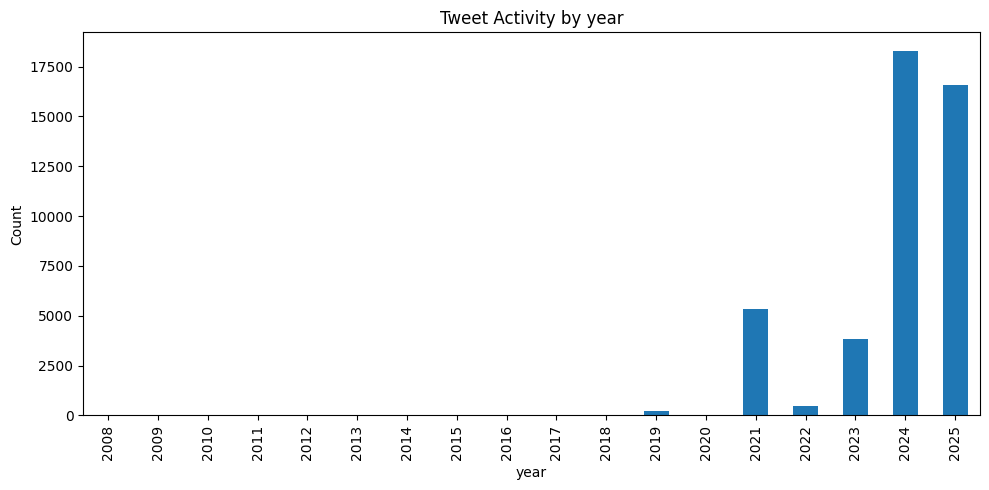

In [11]:
fig = plt.figure(figsize=(10,5))
df["year"].value_counts().sort_index().plot(kind="bar")
plt.title("Tweet Activity by year")
plt.xlabel("year")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [12]:
fig.savefig(os.path.join(save_path, "year_activity.png"))
plt.close()

In [13]:
month_map = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
             7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

df['month_name'] = df['month'].map(month_map)

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_counts = df['month_name'].value_counts().reindex(month_order)

C:\Users\hp\AppData\Local\Temp\ipykernel_2172\3397670308.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette='cubehelix')


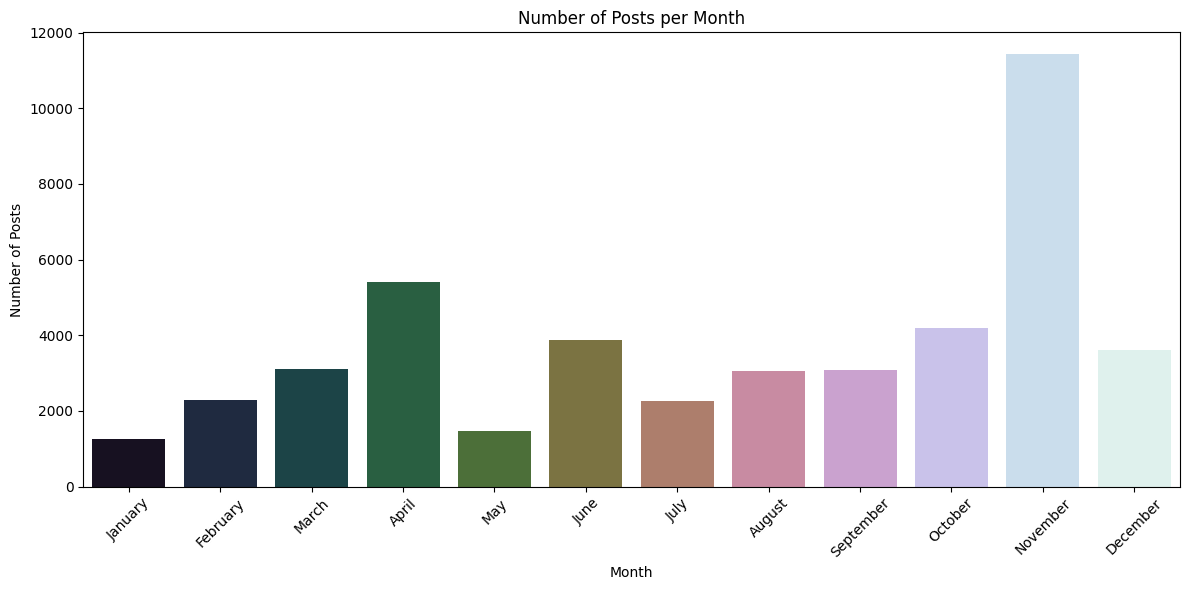

In [14]:
fig = plt.figure(figsize=(12, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='cubehelix')
plt.title("Number of Posts per Month")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()

fig.savefig(save_path)
plt.show()

In [15]:
# Check year distribution
year_counts = df['year'].value_counts().sort_index()
print(year_counts)

print("\nEarliest year:", df['year'].min())
print("Latest year:", df['year'].max())

year
2008        1
2009        7
2010       11
2011       34
2012       25
2013       34
2014       18
2015       40
2016       23
2017       16
2018       18
2019      236
2020       31
2021     5317
2022      491
2023     3818
2024    18303
2025    16582
Name: count, dtype: int64

Earliest year: 2008
Latest year: 2025


# month and year stacked for the twee

In [16]:
month_map = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
             7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
df['month_name'] = df['month'].map(month_map)

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

month_year_counts = df.groupby(['year', 'month_name']).size().reset_index(name='count')

C:\Users\hp\AppData\Local\Temp\ipykernel_2172\2126315560.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_year_counts = df.groupby(['year', 'month_name']).size().reset_index(name='count')


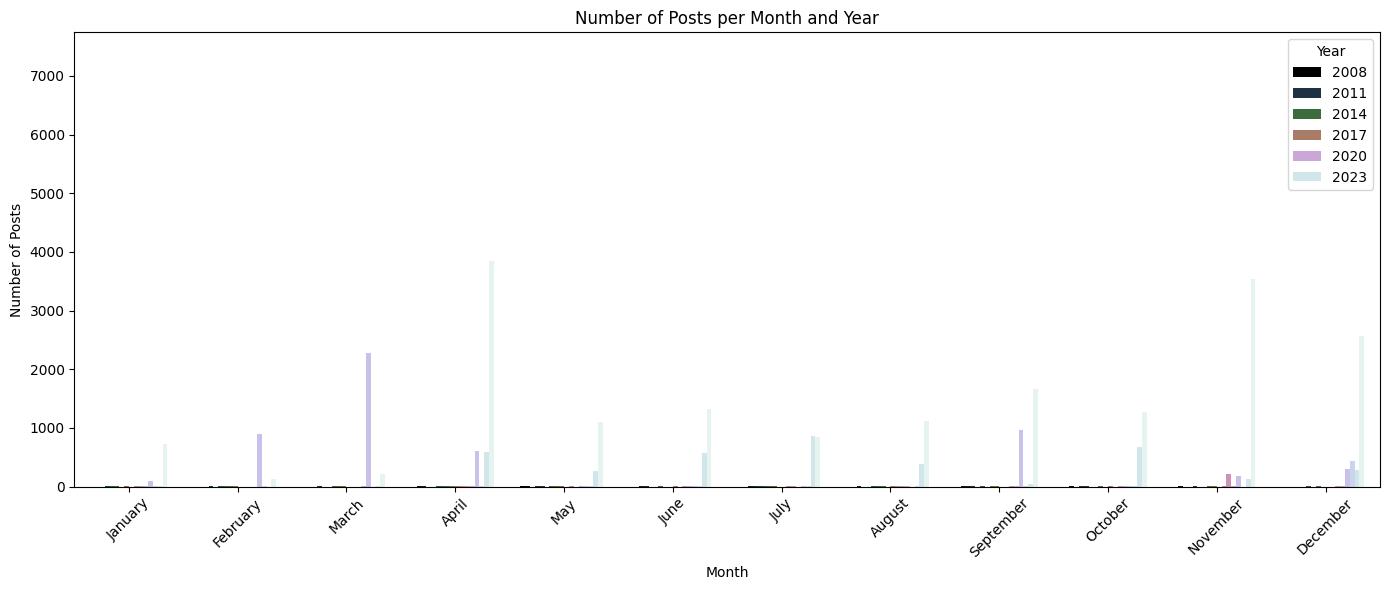

In [17]:
fig = plt.figure(figsize=(14,6))
sns.barplot(data=month_year_counts, x='month_name', y='count', hue='year', palette='cubehelix')
plt.title("Number of Posts per Month and Year")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()

fig.savefig(save_path)
plt.show()

# Text Analysis¶

In [18]:
import neattext.functions as nfx

In [19]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [20]:
import re
import emoji

In [23]:
df['clean_Text'] = df['Tweet_Text'].apply(nfx.remove_hashtags)

In [139]:
df[['Tweet_Text', 'clean_Text']].head(10)

,Tweet_Text,clean_Text
0,The HPV vaccine is a critical step in preventi...,The HPV vaccine is a critical step in preventi...
1,"New month, new experiences, new opportunities,...",New month new experiences new opportunities ne...
2,Blessing is protected against cervical cancer....,Blessing is protected against cervical cancer ...
3,https://t.co/wirqlPgG1q,
4,@science_nigeria @nighealthwatch @Fmohnigeria ...,Congratulations
5,"Our CEO, Chika Offor, is joining other health ...",Our CEO Chika Offor is joining other health ex...
6,@VaccineNet_NG Engages Gombe Stakeholders On ...,Engages Gombe Stakeholders On Increased Fundin...
7,7m Nigerian girls vaccinated against cervical ...,m Nigerian girls vaccinated against cervical c...
8,Today is the International Day for the Elimina...,Today is the International Day for the Elimina...
9,Happy Father's Day to all the amazing dads out...,Happy Fathers Day to all the amazing dads out ...


# removing and cleaning texts from emojis and the likes

In [25]:
def full_clean(text):
    text = emoji.replace_emoji(text, replace='')
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

df['clean_Text'] = df['clean_Text'].astype(str).apply(full_clean)

In [26]:
df['clean_Text'].head()

0    The HPV vaccine is a critical step in preventi...
1    New month new experiences new opportunities ne...
2    Blessing is protected against cervical cancer ...
3                                                     
4                                      Congratulations
Name: clean_Text, dtype: object

In [27]:
from textblob import TextBlob

In [28]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F

# Baseline sentiment Analysis¶

In [29]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

In [30]:
model_name = "lxyuan/distilbert-base-multilingual-cased-sentiments-student"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
sentiment_model = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


Device set to use cpu


In [31]:
def predict_sentiment(texts, model_pipeline, batch_size=32, max_length=512):
    """Return list of labels (lowercased) for texts, safe to long inputs."""
    preds = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        batch_preds = model_pipeline(batch, truncation=True, max_length=max_length)
        batch_labels = [p['label'].lower() for p in batch_preds]
        preds.extend(batch_labels)
    return preds

def predict_with_scores(texts, model_pipeline, batch_size=32, max_length=512):
    """Return (labels, scores) aligned lists."""
    labels = []
    scores = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        batch_preds = model_pipeline(batch, truncation=True, max_length=max_length)
        for p in batch_preds:
            labels.append(p['label'].lower())
            scores.append(float(p['score']))
    return labels, scores

In [32]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.3, random_state=42)
print("Train rows:", train_df.shape[0], "Validation rows:", val_df.shape[0])

Train rows: 31503 Validation rows: 13502


In [84]:
train_df.columns

Index(['Tweet_Text', 'Reply_Count', 'Retweet_Count', 'Like_Count',
       'View_Count', 'Language', 'Source', 'Username', 'Location', 'year',
       'month', 'day', 'hour', 'minute', 'weekday', 'Post_ID', 'ID_Source',
       'month_name', 'clean_Text', 'bert_sentiment'],
      dtype='object')

In [33]:
# Predict on train (pseudo-labeling) and validation (for evaluation later)
train_df['bert_sentiment'] = predict_sentiment(train_df['clean_Text'].tolist(), sentiment_model)
val_df['bert_sentiment']   = predict_sentiment(val_df['clean_Text'].tolist(), sentiment_model)

# Optionally inspect distribution
print("Train predicted distribution:\n", train_df['bert_sentiment'].value_counts(normalize=True) * 100)
print("Val predicted distribution:\n",   val_df['bert_sentiment'].value_counts(normalize=True) * 100)

Train predicted distribution:
 bert_sentiment
positive    56.362886
negative    40.135860
neutral      3.501254
Name: proportion, dtype: float64
Val predicted distribution:
 bert_sentiment
positive    56.510147
negative    39.631166
neutral      3.858688
Name: proportion, dtype: float64


In [34]:
sample_size = 100

sample_frames = []
per_class = int(np.ceil(sample_size / max(1, len(val_df['bert_sentiment'].unique()))))

for cls, group in val_df.groupby('bert_sentiment'):
    n = min(len(group), per_class)
    sample_frames.append(group.sample(n=n, random_state=42))

sample_val_df = pd.concat(sample_frames).drop_duplicates().reset_index(drop=True)
if sample_val_df.shape[0] > sample_size:
    sample_val_df = sample_val_df.sample(n=sample_size, random_state=42).reset_index(drop=True)

# prepare blank true_sentiment column for manual labeling
sample_val_df['true_sentiment'] = ""

# Save to csv for manual labeling in Excel/Sheets
sample_val_df.to_csv("sample_for_manual_labeling1.csv", index=False)

In [35]:
sample_val_df[['clean_Text', 'bert_sentiment', 'true_sentiment']].head()

,clean_Text,bert_sentiment,true_sentiment
0,Debacle in Jesus name Its failed,negative,
1,Not all are the same,neutral,
2,Well Nigeria is not concerned about the health...,neutral,
3,This national schedule for routine immunisatio...,neutral,
4,Almost no one in the country is over,neutral,


In [44]:
sample_val_df.head(2)

,Tweet_Text,Reply_Count,Retweet_Count,Like_Count,View_Count,Language,Source,Username,Location,year,month,day,hour,minute,weekday,Post_ID,ID_Source,month_name,clean_Text,bert_sentiment,true_sentiment
0,@pshegs Debacle in Jesus name. It's failed,0,0,5,621,English,Twitter,fidLjj,"Lagos, Nigeria.",2024,9,3,16,56,Tuesday,SYN_ee69595fe165ff42,Synthetic_ID,September,Debacle in Jesus name Its failed,negative,negative
1,Not all are the same,0,0,1,81,English,Facebook,Damon Neri,The village,2024,8,27,21,51,Tuesday,Y29tbWVudDoxMzcwOTY0MTI3NzMyMzk0XzEzMTEyNDM5Mz...,Platform_ID,August,Not all are the same,neutral,neutral


In [49]:
sample_val_df['true_sentiment'].unique()

array(['negative', 'neutral', 'positive', 'negative '], dtype=object)

In [50]:
sample_val_df = pd.read_csv("sample_for_manual_labeling.csv")

sample_val_df['true_sentiment'] = sample_val_df['true_sentiment'].astype(str).str.lower().str.strip()


allowed = {'positive','negative','neutral'}
unique_labels = set(sample_val_df['true_sentiment'].dropna().unique())
print("Unique manual labels found:", unique_labels)

bad = [x for x in unique_labels if x not in allowed]
if bad:
    raise ValueError(f"Found unexpected labels: {bad}, please normalize to positive, negative, neutral")

if 'Post_ID' in sample_val_df.columns:
    val_merged = val_df.merge(sample_val_df[['Post_ID','true_sentiment']], on='Post_ID', how='left')
else:
    val_merged = val_df.merge(sample_val_df[['clean_Text','true_sentiment']], on='clean_Text', how='left', suffixes=('','_man'))

labeled_val = val_merged[val_merged['true_sentiment'].notna()].copy()
print("Labeled validation rows available for evaluation:", labeled_val.shape[0])
labeled_val[['clean_Text','bert_sentiment','true_sentiment']].head(10)

Unique manual labels found: {'positive', 'neutral', 'negative'}
Labeled validation rows available for evaluation: 134


,clean_Text,bert_sentiment,true_sentiment
80,She is so cute,negative,positive
85,Then we stopped spraying DDT and polio disappe...,negative,neutral
96,Drugs cause more harm than the diseases in way...,negative,negative
114,ay no Orrible,neutral,neutral
217,Not all are the same,neutral,neutral
223,Nope not at all,neutral,neutral
550,They have come again,positive,negative
730,Hope your family has the same fate Humanity wi...,positive,negative
785,DDT also causes poliomyelitis It was sprayed e...,negative,negative
947,ay no Orrible,neutral,neutral


In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

le = LabelEncoder()
y_true = le.fit_transform(labeled_val['true_sentiment'])
y_pred = le.transform(labeled_val['bert_sentiment'])

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
print("Number of eval samples:", len(y_true))

Label mapping: {'negative': np.int64(0), 'neutral': np.int64(1), 'positive': np.int64(2)}
Number of eval samples: 134


In [54]:
print("\nAccuracy:", accuracy_score(y_true, y_pred))
print("Precision (macro):", precision_score(y_true, y_pred, average='macro', zero_division=0))
print("Recall (macro):", recall_score(y_true, y_pred, average='macro', zero_division=0))
print("F1 Score (macro):", f1_score(y_true, y_pred, average='macro', zero_division=0))


Accuracy: 0.6716417910447762
Precision (macro): 0.6720331048945812
Recall (macro): 0.6858340072625787
F1 Score (macro): 0.6713450292397661


In [57]:
df.columns

Index(['Tweet_Text', 'Reply_Count', 'Retweet_Count', 'Like_Count',
       'View_Count', 'Language', 'Source', 'Username', 'Location', 'year',
       'month', 'day', 'hour', 'minute', 'weekday', 'Post_ID', 'ID_Source',
       'month_name', 'clean_Text'],
      dtype='object')

In [55]:
print("\nClassification report:")
print(classification_report(y_true, y_pred, target_names=le.classes_, zero_division=0))


Classification report:
              precision    recall  f1-score   support

    negative       0.72      0.60      0.65        52
     neutral       0.72      0.67      0.69        49
    positive       0.58      0.79      0.67        33

    accuracy                           0.67       134
   macro avg       0.67      0.69      0.67       134
weighted avg       0.68      0.67      0.67       134



In [56]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
print(cm)


Confusion Matrix:
[[31 12  9]
 [ 6 33 10]
 [ 6  1 26]]


# getting the emotion of the data

In [64]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

In [66]:

# Load the Hartmann emotion model
model_name = "j-hartmann/emotion-english-distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

C:\Users\hp\guidmatplotlib_env\lib\site-packages\huggingface_hub\file_download.py:801: UserWarning: Not enough free disk space to download the file. The expected file size is: 328.51 MB. The target location C:\Users\hp\.cache\huggingface\hub\models--j-hartmann--emotion-english-distilroberta-base\blobs only has 184.27 MB free disk space.
  warnings.warn(
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:  96%|#########5| 315M/329M [00:00<?, ?B/s]

In [67]:
def get_emotion(text):
    if not isinstance(text, str) or text.strip() == "":
        return "unknown"
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    outputs = model(**inputs)
    probs = torch.softmax(outputs.logits, dim=1).detach().numpy()[0]
    emotion_id = np.argmax(probs)
    emotion_label = model.config.id2label[emotion_id]
    return emotion_label

# Apply emotion detection to your clean_Text column
df["emotion"] = df["clean_Text"].apply(get_emotion)


In [68]:
df.columns

Index(['Tweet_Text', 'Reply_Count', 'Retweet_Count', 'Like_Count',
       'View_Count', 'Language', 'Source', 'Username', 'Location', 'year',
       'month', 'day', 'hour', 'minute', 'weekday', 'Post_ID', 'ID_Source',
       'month_name', 'clean_Text', 'emotion'],
      dtype='object')

In [69]:
df['emotion'].unique()

array(['neutral', 'joy', 'unknown', 'fear', 'disgust', 'surprise',
       'sadness', 'anger'], dtype=object)

In [70]:
# Create directory for saving
plot_dir = r"C:\Users\hp\Desktop\immuniwatch_plots"
os.makedirs(plot_dir, exist_ok=True)

In [72]:
# Save plot
save_path = os.path.join(plot_dir, "emotion_distribution_pie.png")
plt.savefig(save_path, dpi=300)

plt.show()


<Figure size 640x480 with 0 Axes>


Emotion Statistics Table
 Emotion  Count  Percentage
 neutral  23064       51.25
     joy   4574       10.16
 unknown   3650        8.11
 sadness   3601        8.00
   anger   3187        7.08
surprise   2398        5.33
    fear   2327        5.17
 disgust   2204        4.90


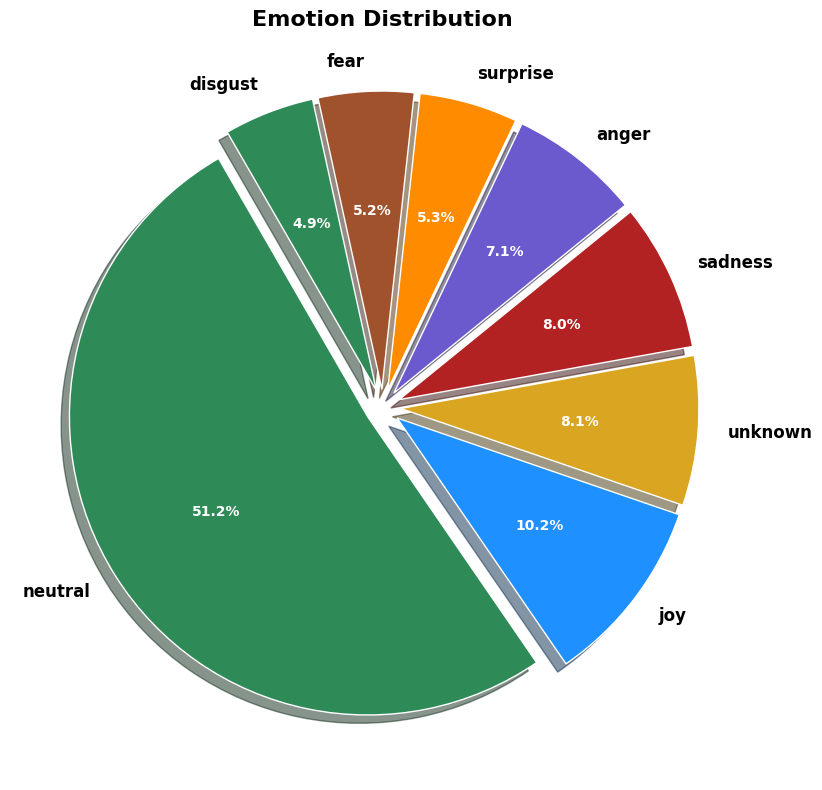

In [75]:
# Count emotions
emotion_counts = df["emotion"].value_counts()
emotion_percent = (emotion_counts / emotion_counts.sum()) * 100

# Create a table DataFrame
emotion_table = pd.DataFrame({
    "Emotion": emotion_counts.index,
    "Count": emotion_counts.values,
    "Percentage": emotion_percent.values.round(2)
})

print("\nEmotion Statistics Table")
print(emotion_table.to_string(index=False))

# Labels and sizes
labels = emotion_percent.index
sizes = emotion_percent.values

# Color palette
colors = ['#2E8B57', '#1E90FF', '#DAA520', '#B22222', '#6A5ACD', '#FF8C00', '#A0522D']
colors = colors[:len(labels)]

# Explode effect
explode = [0.06] * len(labels)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    explode=explode,
    shadow=True,
    startangle=120,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

for t in texts:
    t.set_fontsize(12)
    t.set_weight('bold')

for a in autotexts:
    a.set_color('white')
    a.set_weight('bold')

plt.title("Emotion Distribution", fontsize=16, weight='bold')
plt.tight_layout()



In [76]:
# Save plot
save_path = os.path.join(plot_dir, "emotion_distribution_pie.png")
fig.savefig(save_path, dpi=300)

plt.show()

# sentiment bar plot

In [85]:
train_df.columns

Index(['Tweet_Text', 'Reply_Count', 'Retweet_Count', 'Like_Count',
       'View_Count', 'Language', 'Source', 'Username', 'Location', 'year',
       'month', 'day', 'hour', 'minute', 'weekday', 'Post_ID', 'ID_Source',
       'month_name', 'clean_Text', 'bert_sentiment'],
      dtype='object')


Sentiment Statistics Table
Sentiment  Count  Percentage
 positive  17756       56.36
 negative  12644       40.14
  neutral   1103        3.50


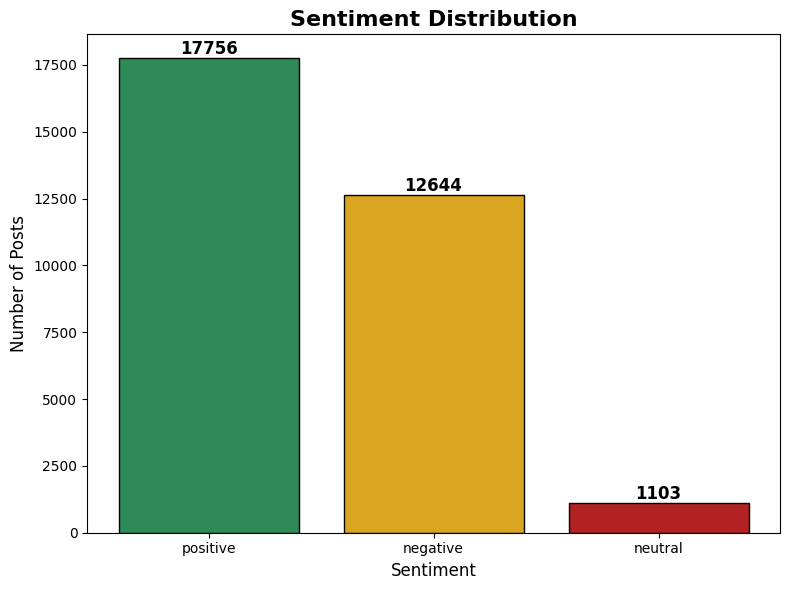

In [90]:
# Count sentiments from bert_sentiment column in train_df
sentiment_counts = train_df["bert_sentiment"].value_counts()
sentiment_percent = (sentiment_counts / sentiment_counts.sum()) * 100

# Create table DataFrame
sentiment_table = pd.DataFrame({
    "Sentiment": sentiment_counts.index,
    "Count": sentiment_counts.values,
    "Percentage": sentiment_percent.values.round(2)
})

print("\nSentiment Statistics Table")
print(sentiment_table.to_string(index=False))

# Plot
fig, ax = plt.subplots(figsize=(8,6))

bars = ax.bar(
    sentiment_counts.index,
    sentiment_counts.values,
    color=['#2E8B57', '#DAA520', '#B22222'],  # green, gold, red
    edgecolor='black'
)

# Add labels on top
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height + 2, 
        f'{height}', 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold'
    )

ax.set_title("Sentiment Distribution", fontsize=16, fontweight='bold')
ax.set_ylabel("Number of Posts", fontsize=12)
ax.set_xlabel("Sentiment", fontsize=12)
plt.tight_layout()



In [91]:
# Save plot
save_path = os.path.join(plot_dir, "bert_sentiment_distribution_bar.png")
fig.savefig(save_path, dpi=300)

plt.show()
print("\nBar chart saved to:", save_path)


Bar chart saved to: C:\Users\hp\Desktop\immuniwatch_plots\bert_sentiment_distribution_bar.png


In [92]:
df.columns

Index(['Tweet_Text', 'Reply_Count', 'Retweet_Count', 'Like_Count',
       'View_Count', 'Language', 'Source', 'Username', 'Location', 'year',
       'month', 'day', 'hour', 'minute', 'weekday', 'Post_ID', 'ID_Source',
       'month_name', 'clean_Text', 'emotion'],
      dtype='object')

# location

In [94]:
min_posts = 20 

location_counts = df['Location'].value_counts()

valid_locations = location_counts[location_counts >= min_posts].index

# Filter dataframe
df_filtered = df[df['Location'].isin(valid_locations)].copy()

In [95]:
dropped_locations = location_counts[location_counts < min_posts].index
print(f"Locations dropped due to low post counts ({len(dropped_locations)}):")
print(list(dropped_locations))

print(f"Remaining locations for analysis: {len(valid_locations)}")
print(df_filtered['Location'].value_counts())

Locations dropped due to low post counts (1859):
['Manchester, UK', 'Connecticut, USA', 'Pacific Palisades, Los Angeles', 'United Kingdom ', 'India ', 'Orange County, CA', 'Where ever I am.', 'Lagos State', 'Florida, US state', 'Serengeti, Kenya', 'Deutschland ', 'Budapest, Hungary', 'Berlin, Germany', 'U.S.A. - Puerto Rico 🇵🇷', 'Kano & Lagos, Nigeria', 'Abeokuta, Ogun State Nigeria', 'Russia', '𝗽𝗮𝗿𝗮𝗱𝗶𝘀𝗲', 'Satire st, Entertainmentville', 'The border of Order & Chaos', '#MAINESTRONG', 'US', 'His kingdom', 'Singapore', 'Bharat', 'nigeria,maiduguri', 'Texas!!!', 'Right behind you!', 'india', 'Mount Olympus, UT', 'Bretagne Finistère', 'Johns Creek, GA', 'Dublin Ireland', 'Melbourne Australia', 'Minneapolis, MN', 'Punta Gorda, FL', 'Richmond, VA', 'Bareilly', 'Willis, TX', 'Baltimore, MD', 'North Rhine-Westphalia, German', 'PNW', 'Pune, Maharashtra, India', 'Seaside, California, USA', 'In Christ ', 'Flat Earth', 'Afterlife....', 'भारत', 'Nakuru, Kenya', '15 minute smart city ', 'Burlington

In [ ]:
save_path = os.path.join(plot_dir, f"posts_per_location_top_{top_n}.png")
plt.savefig(save_path, dpi=300)
plt.show()

print("\nBar chart saved to:", save_path)


Top Locations Statistics Table
                      Location  Count  Percentage
                       Nigeria   4917       31.34
                Lagos, Nigeria   3793       24.17
                Abuja, Nigeria   2123       13.53
                 United States    748        4.77
                        Canada    413        2.63
                           USA    405        2.58
                  Florida, USA    394        2.51
                         Lagos    348        2.22
                         Earth    342        2.18
                Enugu, Nigeria    282        1.80
                 Lagos Nigeria    240        1.53
Federal Capital Territory, Nig    206        1.31
                         India    205        1.31
               Ilorin, Nigeria    202        1.29
               Lagos, Nigeria.    187        1.19
               London, England    185        1.18
                  DC via Abuja    183        1.17
                        Global    179        1.14
                Un

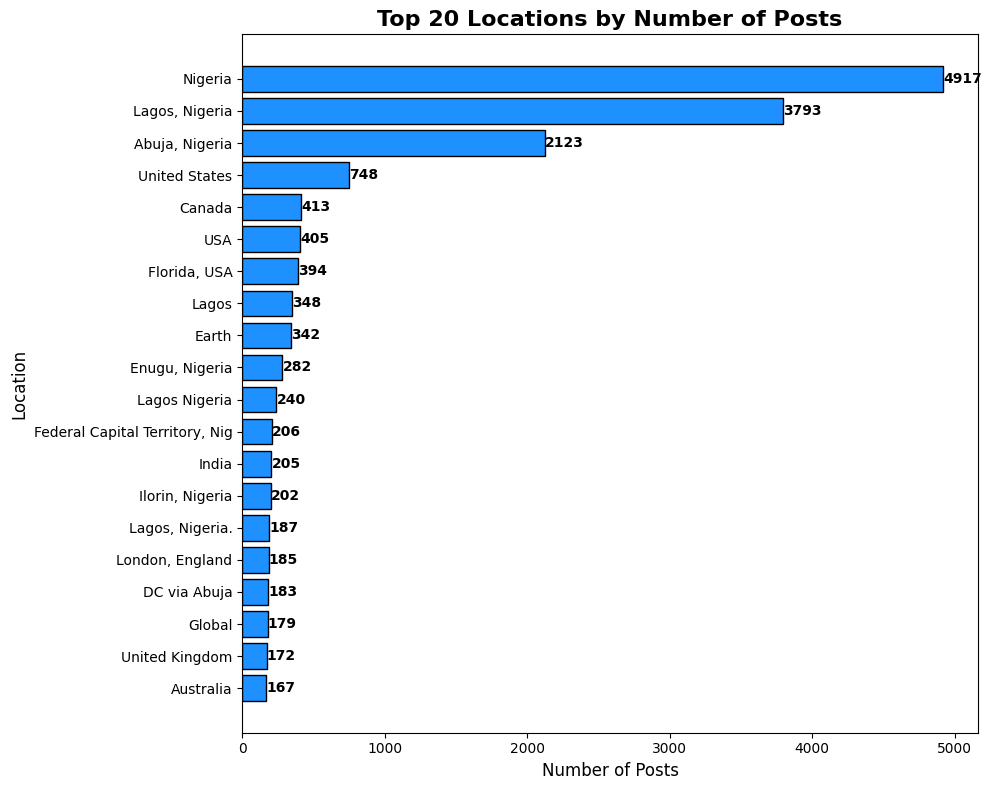

In [99]:
location_counts_filtered = df_filtered['Location'].value_counts()

top_n = 20
location_counts_top = location_counts_filtered.head(top_n)


location_percent = (location_counts_top / location_counts_top.sum()) * 100
location_table = pd.DataFrame({
    "Location": location_counts_top.index,
    "Count": location_counts_top.values,
    "Percentage": location_percent.round(2)
})

print("\nTop Locations Statistics Table")
print(location_table.to_string(index=False))

# Horizontal bar plot
fig, ax = plt.subplots(figsize=(10,8))
bars = ax.barh(location_counts_top.index[::-1], location_counts_top.values[::-1], color='#1E90FF', edgecolor='black')

for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center', fontsize=10, fontweight='bold')

ax.set_title(f"Top {top_n} Locations by Number of Posts", fontsize=16, fontweight='bold')
ax.set_xlabel("Number of Posts", fontsize=12)
ax.set_ylabel("Location", fontsize=12)
plt.tight_layout()

In [100]:
# Save plot
save_path = os.path.join(plot_dir, f"posts_per_location_top_{top_n}_horizontal.png")
fig.savefig(save_path, dpi=300)
plt.show()

In [101]:
df.columns

Index(['Tweet_Text', 'Reply_Count', 'Retweet_Count', 'Like_Count',
       'View_Count', 'Language', 'Source', 'Username', 'Location', 'year',
       'month', 'day', 'hour', 'minute', 'weekday', 'Post_ID', 'ID_Source',
       'month_name', 'clean_Text', 'emotion'],
      dtype='object')

In [105]:
# Nigerian states and capitals mapping
nigeria_states_capitals = {
    'abia': 'Umuahia, Abia', 'adamawa': 'Yola, Adamawa', 'akwa ibom': 'Uyo, Akwa Ibom',
    'anambra': 'Awka, Anambra', 'bauchi': 'Bauchi, Bauchi', 'bayelsa': 'Yenagoa, Bayelsa',
    'benue': 'Makurdi, Benue', 'borno': 'Maiduguri, Borno', 'cross river': 'Calabar, Cross River',
    'delta': 'Asaba, Delta', 'ebonyi': 'Abakaliki, Ebonyi', 'edo': 'Benin City, Edo',
    'ekiti': 'Ado-Ekiti, Ekiti', 'enugu': 'Enugu, Enugu', 'gombe': 'Gombe, Gombe',
    'imo': 'Owerri, Imo', 'jigawa': 'Dutse, Jigawa', 'kaduna': 'Kaduna, Kaduna',
    'kano': 'Kano, Kano', 'katsina': 'Katsina, Katsina', 'kebbi': 'Birnin Kebbi, Kebbi',
    'kogi': 'Lokoja, Kogi', 'kwara': 'Ilorin, Kwara', 'lagos': 'Ikeja, Lagos',
    'nasarawa': 'Lafia, Nasarawa', 'niger': 'Minna, Niger', 'ogun': 'Abeokuta, Ogun',
    'ondo': 'Akure, Ondo', 'osun': 'Osogbo, Osun', 'oyo': 'Ibadan, Oyo',
    'plateau': 'Jos, Plateau', 'rivers': 'Port Harcourt, Rivers', 'sokoto': 'Sokoto, Sokoto',
    'taraba': 'Jalingo, Taraba', 'yobe': 'Damaturu, Yobe', 'zamfara': 'Gusau, Zamfara',
    'fct': 'Abuja, FCT'
}


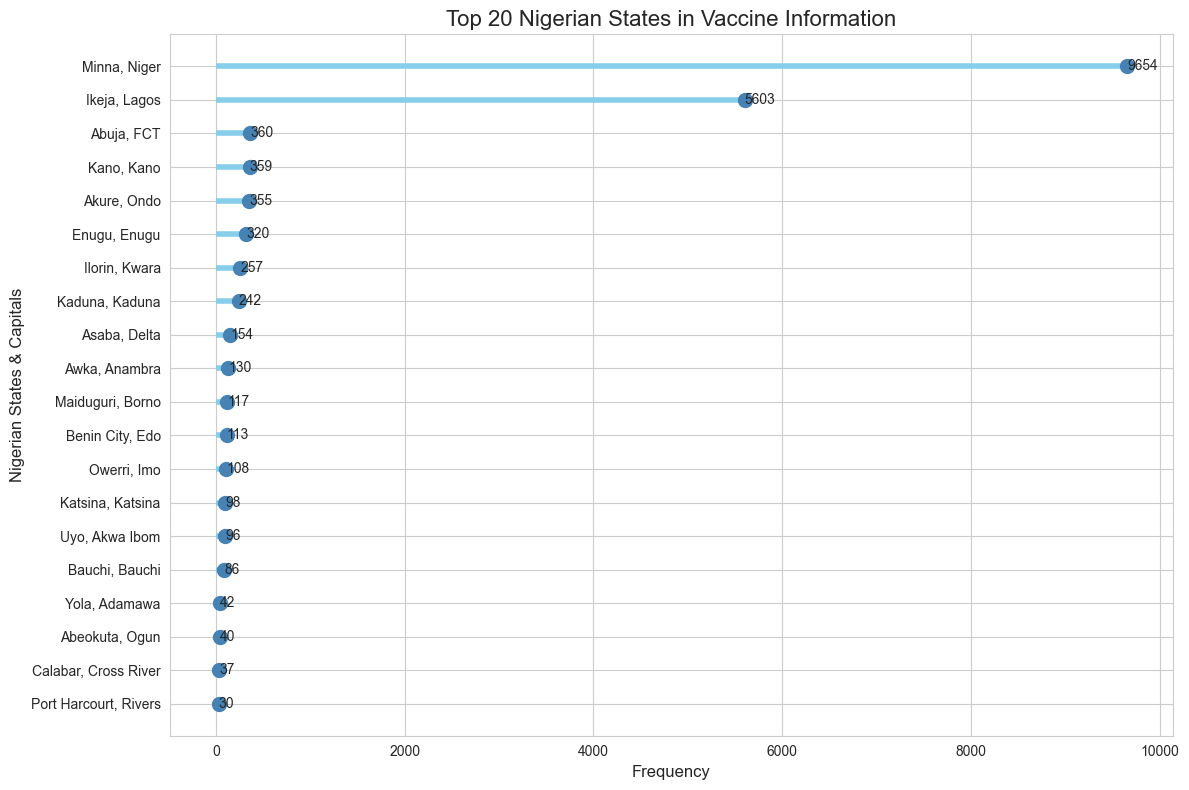

In [107]:
def clean_location(loc):
    if not isinstance(loc, str):
        return None
    loc = loc.strip().lower()
    loc = re.sub(r'\.+$', '', loc)  # remove trailing periods
    loc = re.sub(r'[^\w\s,]', '', loc)  # remove special characters except comma

    for state, capital in nigeria_states_capitals.items():
        if state in loc or capital.split(',')[0].lower() in loc:
            return capital
    return None

df['nigeria_location'] = df['Location'].apply(clean_location)

nigeria_df = df.dropna(subset=['nigeria_location'])

# Count frequency and limit to top 20
location_counts = nigeria_df['nigeria_location'].value_counts().head(20).reset_index()
location_counts.columns = ['Location', 'Count']
location_counts = location_counts.sort_values('Count', ascending=True)

fig, ax = plt.subplots(figsize=(12, 8))
sns.set_style("whitegrid")

ax.hlines(y=location_counts['Location'], xmin=0, xmax=location_counts['Count'], color='skyblue', linewidth=4)
ax.plot(location_counts['Count'], location_counts['Location'], "o", markersize=10, color='steelblue')

for index, row in location_counts.iterrows():
    ax.text(row['Count'] + 0.5, row['Location'], str(row['Count']), va='center', fontsize=10)

ax.set_xlabel("Frequency", fontsize=12)
ax.set_ylabel("Nigerian States & Capitals", fontsize=12)
ax.set_title("Top 20 Nigerian States in Vaccine Information", fontsize=16)
plt.tight_layout()

In [108]:
# Save plot
save_path = os.path.join(plot_dir, "nigerian_states_frequency_top20.png")
fig.savefig(save_path, dpi=300)
plt.show()

print("\nPlot saved to:", save_path)
print("\nTop 20 Nigerian Locations Table")
print(location_counts.to_string(index=False))


Plot saved to: C:\Users\hp\Desktop\immuniwatch_plots\nigerian_states_frequency_top20.png

Top 20 Nigerian Locations Table
             Location  Count
Port Harcourt, Rivers     30
 Calabar, Cross River     37
       Abeokuta, Ogun     40
        Yola, Adamawa     42
       Bauchi, Bauchi     86
       Uyo, Akwa Ibom     96
     Katsina, Katsina     98
          Owerri, Imo    108
      Benin City, Edo    113
     Maiduguri, Borno    117
        Awka, Anambra    130
         Asaba, Delta    154
       Kaduna, Kaduna    242
        Ilorin, Kwara    257
         Enugu, Enugu    320
          Akure, Ondo    355
           Kano, Kano    359
           Abuja, FCT    360
         Ikeja, Lagos   5603
         Minna, Niger   9654


# states sentiments

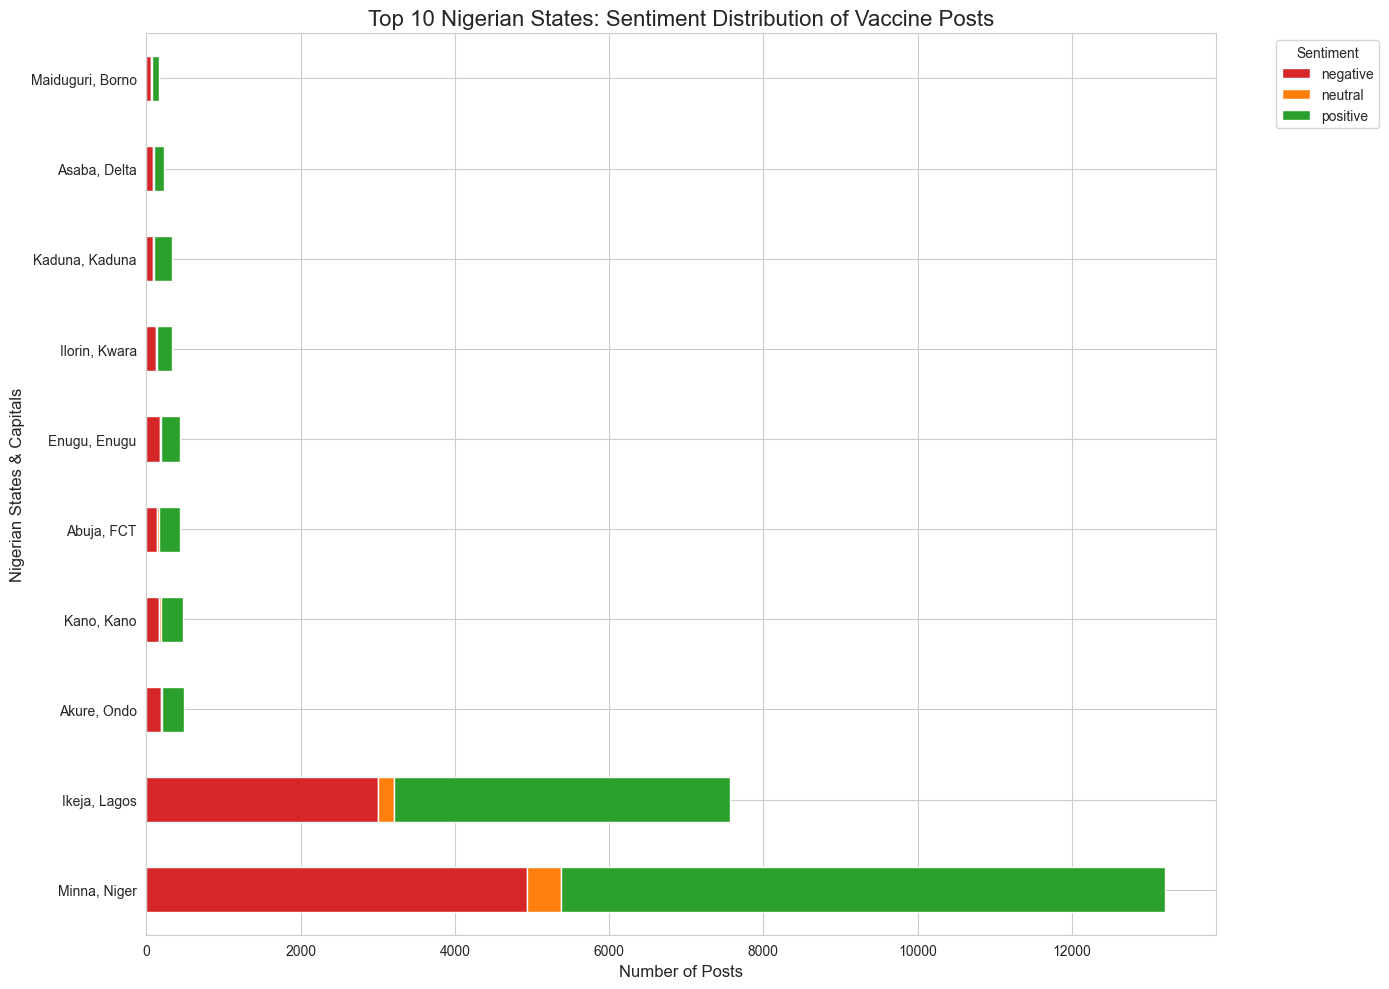

In [119]:
# Merge train_df with nigeria_location from df using Post_ID
df_merged = pd.merge(
    train_df,  # contains bert_sentiment
    df[['Post_ID', 'nigeria_location']],  # contains cleaned locations
    on='Post_ID',
    how='left'
)

valid_sentiments = ['positive', 'neutral', 'negative']
df_sentiment = df_merged[
    df_merged['nigeria_location'].notna() &
    df_merged['bert_sentiment'].isin(valid_sentiments)
].copy()

sentiment_counts = pd.pivot_table(
    df_sentiment,
    index='nigeria_location',
    columns='bert_sentiment',
    aggfunc='size',
    fill_value=0
)

for sentiment in valid_sentiments:
    if sentiment not in sentiment_counts.columns:
        sentiment_counts[sentiment] = 0

sentiment_counts['total'] = sentiment_counts.sum(axis=1)
sentiment_counts = sentiment_counts.sort_values('total', ascending=True)
sentiment_counts = sentiment_counts.drop(columns='total')

# Limit to top 20 states by total posts
top_n = 10
top_states = sentiment_counts.sum(axis=1).sort_values(ascending=False).head(top_n).index
sentiment_counts_top = sentiment_counts.loc[top_states]

# Plot
fig, ax = plt.subplots(figsize=(14, 10))
sns.set_style("whitegrid")
colors = {'positive': '#2ca02c', 'neutral': '#ff7f0e', 'negative': '#d62728'}

sentiment_counts_top.plot(
    kind='barh',
    stacked=True,
    color=[colors[c] for c in sentiment_counts_top.columns],
    ax=ax
)

ax.set_xlabel("Number of Posts", fontsize=12)
ax.set_ylabel("Nigerian States & Capitals", fontsize=12)
ax.set_title("Top 10 Nigerian States: Sentiment Distribution of Vaccine Posts", fontsize=16)
ax.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [120]:
# Save plot
save_path = os.path.join(plot_dir, "nigerian_states_sentiment_top20.png")
fig.savefig(save_path, dpi=300)
plt.show()

# Print summary table with percentages
summary_table = sentiment_counts_top.copy()
summary_table['Total'] = summary_table.sum(axis=1)
summary_table = summary_table.sort_values('Total', ascending=False)
summary_table['Positive %'] = (summary_table['positive'] / summary_table['Total'] * 100).round(2)
summary_table['Neutral %'] = (summary_table['neutral'] / summary_table['Total'] * 100).round(2)
summary_table['Negative %'] = (summary_table['negative'] / summary_table['Total'] * 100).round(2)

print("\nPlot saved to:", save_path)
print("\nTop 20 Nigerian States Sentiment Summary Table")
print(summary_table.to_string(index=True))



Plot saved to: C:\Users\hp\Desktop\immuniwatch_plots\nigerian_states_sentiment_top20.png

Top 20 Nigerian States Sentiment Summary Table
bert_sentiment    negative  neutral  positive  Total  Positive %  Neutral %  Negative %
nigeria_location                                                                       
Minna, Niger          4935      443      7832  13210       59.29       3.35       37.36
Ikeja, Lagos          2999      217      4358   7574       57.54       2.87       39.60
Akure, Ondo            196       12       276    484       57.02       2.48       40.50
Kano, Kano             169       16       295    480       61.46       3.33       35.21
Abuja, FCT             140       18       277    435       63.68       4.14       32.18
Enugu, Enugu           177       15       240    432       55.56       3.47       40.97
Ilorin, Kwara          121       12       206    339       60.77       3.54       35.69
Kaduna, Kaduna          85       11       233    329       70.82      

In [123]:
df.columns

Index(['Tweet_Text', 'Reply_Count', 'Retweet_Count', 'Like_Count',
       'View_Count', 'Language', 'Source', 'Username', 'Location', 'year',
       'month', 'day', 'hour', 'minute', 'weekday', 'Post_ID', 'ID_Source',
       'month_name', 'clean_Text', 'emotion', 'nigeria_location'],
      dtype='object')

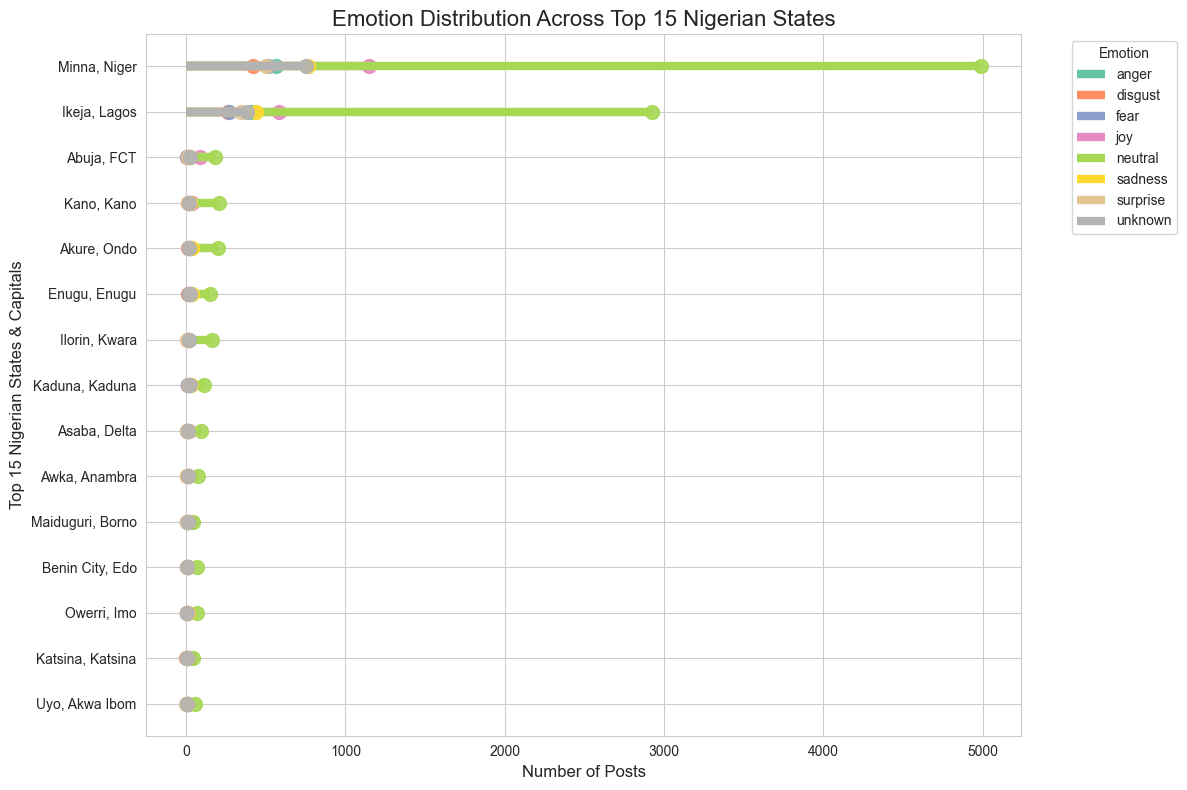

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Directory to save plots
plot_dir = r"C:\Users\hp\Desktop\immuniwatch_plots"
os.makedirs(plot_dir, exist_ok=True)

# Keep only posts with valid Nigerian location and emotion
df_emotion = df[df['nigeria_location'].notna() & df['emotion'].notna()].copy()

# Count number of posts per state per emotion
emotion_counts = df_emotion.groupby(['nigeria_location', 'emotion']).size().reset_index(name='Count')

# Pivot for easier plotting
emotion_pivot = emotion_counts.pivot(index='nigeria_location', columns='emotion', values='Count').fillna(0)

# Calculate total posts per state and select top 15
emotion_pivot['total'] = emotion_pivot.sum(axis=1)
top_states = emotion_pivot.sort_values('total', ascending=False).head(15).index
emotion_pivot_top = emotion_pivot.loc[top_states].drop(columns='total')

# Sort states for better visualization (ascending total)
emotion_pivot_top['total'] = emotion_pivot_top.sum(axis=1)
emotion_pivot_top = emotion_pivot_top.sort_values('total', ascending=True)
emotion_pivot_top = emotion_pivot_top.drop(columns='total')

# Plotting: horizontal lollipop style
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_style("whitegrid")
colors = sns.color_palette("Set2", n_colors=len(emotion_pivot_top.columns))

for i, emotion in enumerate(emotion_pivot_top.columns):
    ax.hlines(
        y=emotion_pivot_top.index,
        xmin=0,
        xmax=emotion_pivot_top[emotion],
        color=colors[i],
        linewidth=6,
        label=emotion
    )
    ax.plot(
        emotion_pivot_top[emotion],
        emotion_pivot_top.index,
        "o",
        color=colors[i],
        markersize=10,
        alpha=0.9
    )

ax.set_xlabel("Number of Posts", fontsize=12)
ax.set_ylabel("Top 15 Nigerian States & Capitals", fontsize=12)
ax.set_title("Emotion Distribution Across Top 15 Nigerian States", fontsize=16)
ax.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

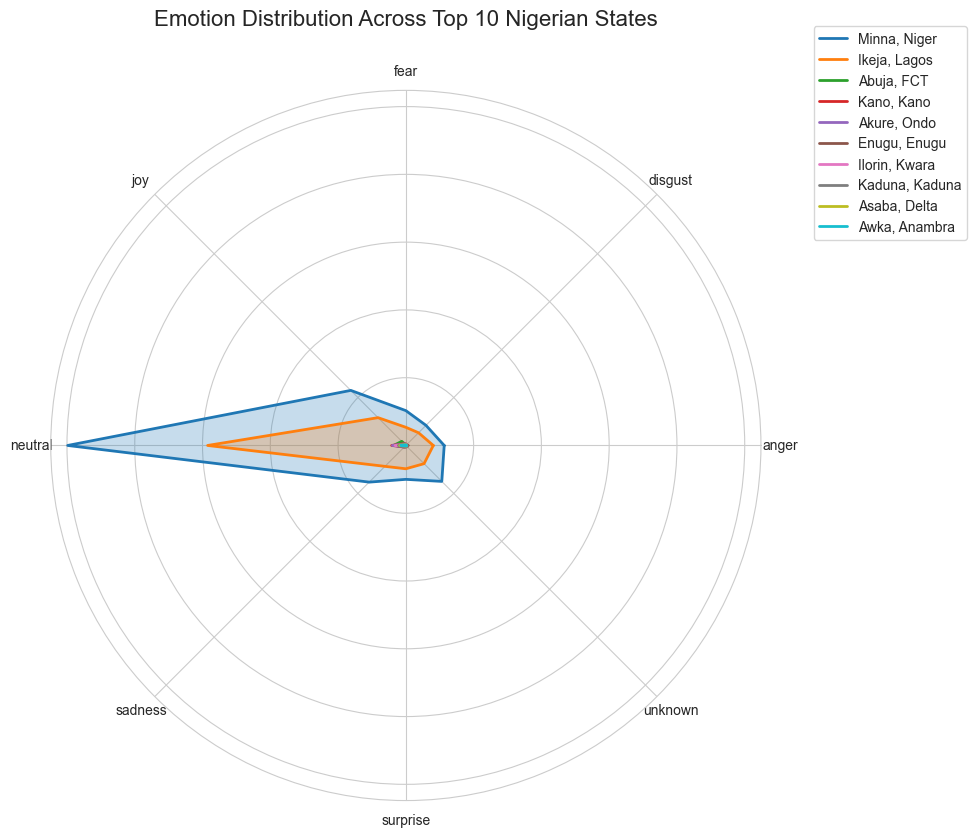

In [127]:
# Keep only posts with valid Nigerian location and emotion
df_emotion = df[df['nigeria_location'].notna() & df['emotion'].notna()].copy()

# Count number of posts per state per emotion
emotion_counts = df_emotion.groupby(['nigeria_location', 'emotion']).size().reset_index(name='Count')

emotion_pivot = emotion_counts.pivot(index='nigeria_location', columns='emotion', values='Count').fillna(0)

emotion_pivot['total'] = emotion_pivot.sum(axis=1)
top_states = emotion_pivot.sort_values('total', ascending=False).head(10).index
emotion_pivot_top = emotion_pivot.loc[top_states].drop(columns='total')

labels = emotion_pivot_top.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] 

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot each state
for idx, row in emotion_pivot_top.iterrows():
    values = row.tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, linewidth=2, label=idx)
    ax.fill(angles, values, alpha=0.25) 

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.set_title("Emotion Distribution Across Top 10 Nigerian States", fontsize=16, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()

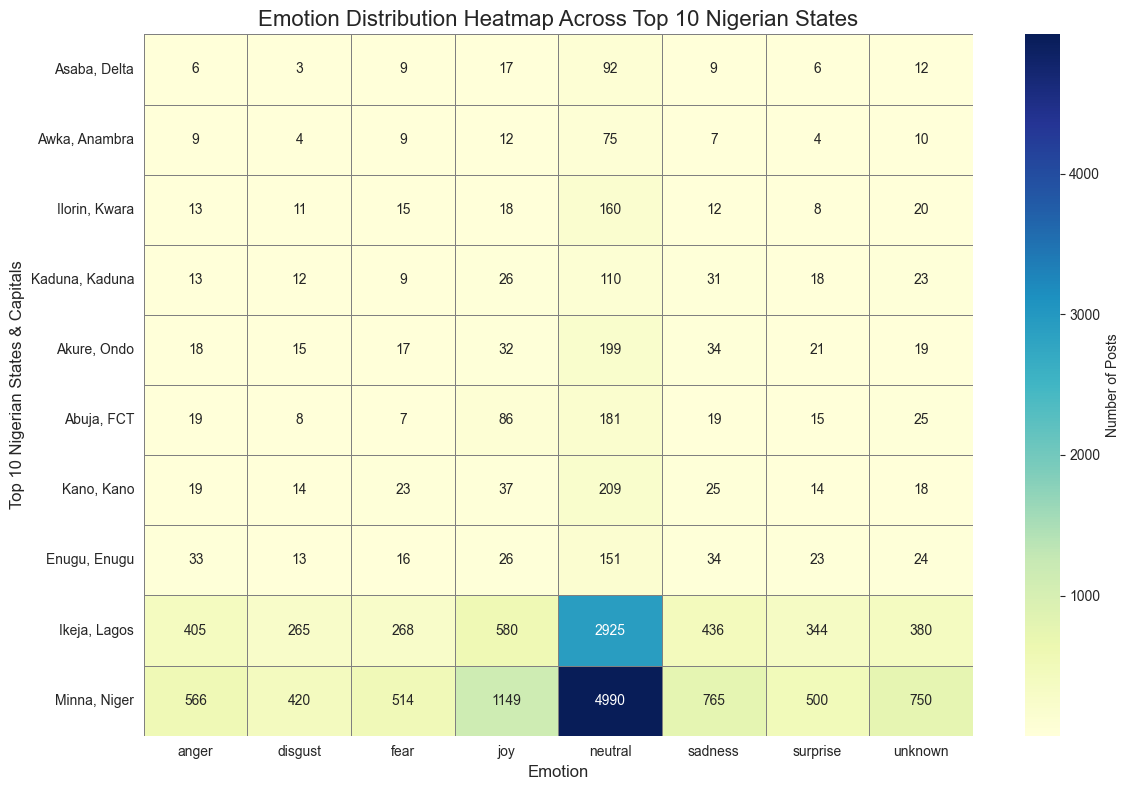

In [131]:
df_emotion = df[df['nigeria_location'].notna() & df['emotion'].notna()].copy()

# Count number of posts per state per emotion
emotion_counts = df_emotion.groupby(['nigeria_location', 'emotion']).size().reset_index(name='Count')

# Pivot to wide format
emotion_pivot = emotion_counts.pivot(index='nigeria_location', columns='emotion', values='Count').fillna(0)

# Select top 10 states by total posts to avoid clutter
emotion_pivot['total'] = emotion_pivot.sum(axis=1)
top_states = emotion_pivot.sort_values('total', ascending=False).head(10).index
emotion_pivot_top = emotion_pivot.loc[top_states].drop(columns='total')

emotion_pivot_top = emotion_pivot_top.sort_values(by=emotion_pivot_top.columns.tolist(), ascending=True)

fig = plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax = sns.heatmap(
    emotion_pivot_top,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Number of Posts'}
)

ax.set_xlabel("Emotion", fontsize=12)
ax.set_ylabel("Top 10 Nigerian States & Capitals", fontsize=12)
ax.set_title("Emotion Distribution Heatmap Across Top 10 Nigerian States", fontsize=16)
plt.tight_layout()

In [132]:
save_path = os.path.join(plot_dir, "nigerian_states_emotion_heatmap_top10.png")
fig.savefig(save_path, dpi=300)
plt.show()

In [130]:
# Summary table with counts and percentages
summary_table = emotion_pivot_top.copy()
summary_table['Total'] = summary_table.sum(axis=1)
for col in emotion_pivot_top.columns:
    summary_table[col + ' %'] = (summary_table[col] / summary_table['Total'] * 100).round(2)


print("\nTop 10 Nigerian States Emotion Summary Table (Counts & Percentages)")
print(summary_table.to_string())


Top 10 Nigerian States Emotion Summary Table (Counts & Percentages)
emotion           anger  disgust   fear     joy  neutral  sadness  surprise  unknown   Total  anger %  disgust %  fear %  joy %  neutral %  sadness %  surprise %  unknown %
nigeria_location                                                                                                                                                            
Asaba, Delta        6.0      3.0    9.0    17.0     92.0      9.0       6.0     12.0   154.0     3.90       1.95    5.84  11.04      59.74       5.84        3.90       7.79
Awka, Anambra       9.0      4.0    9.0    12.0     75.0      7.0       4.0     10.0   130.0     6.92       3.08    6.92   9.23      57.69       5.38        3.08       7.69
Ilorin, Kwara      13.0     11.0   15.0    18.0    160.0     12.0       8.0     20.0   257.0     5.06       4.28    5.84   7.00      62.26       4.67        3.11       7.78
Kaduna, Kaduna     13.0     12.0    9.0    26.0    110.0     31.0 